In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../databases/ENEM_2023_FINAL_num.csv")
df.head()

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,INTERNET_CASA,EST_IDADE,EST_RENDA_PER_CAP,EST_CELULAR_PER_CAP,EST_COMP_PER_CAP,EST_VEICULO_PER_CAP,EST_ELE_DOM_PER_CAP
0,Masculino,Parda,Privada,510.1,483.8,484.5,492.3,520.0,EM incompleto,ES incompleto,True,19.0,2310.002500,2.250,1.000,0.50,4.750000
1,Feminino,Branca,Estadual,583.3,474.1,564.6,599.3,660.0,EM incompleto,PG incompleto,True,18.0,1188.001000,0.900,0.400,0.00,1.800000
2,Masculino,Branca,Privada,646.5,620.7,801.6,585.7,740.0,PG completo,PG completo,True,18.0,2475.001250,0.750,1.125,0.25,1.500000
3,Feminino,Branca,Privada,553.4,495.1,605.8,554.6,880.0,PG incompleto,PG incompleto,True,17.0,2475.001250,1.125,0.500,0.25,2.625000
4,Feminino,Branca,Privada,616.3,589.7,682.8,636.7,860.0,PG incompleto,PG incompleto,True,18.0,3300.001667,1.000,1.000,0.00,1.666667


In [5]:
df = df[['NU_NOTA_CH',
        'NU_NOTA_CN',
        'NU_NOTA_MT',
        'NU_NOTA_LC',
        'NU_NOTA_REDACAO',
        'EST_IDADE',
        'EST_RENDA_PER_CAP',
        'EST_CELULAR_PER_CAP',
        'EST_COMP_PER_CAP',
        'EST_VEICULO_PER_CAP',
        'EST_ELE_DOM_PER_CAP'
        ]]

df.head()

,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,EST_IDADE,EST_RENDA_PER_CAP,EST_CELULAR_PER_CAP,EST_COMP_PER_CAP,EST_VEICULO_PER_CAP,EST_ELE_DOM_PER_CAP
0,510.1,483.8,484.5,492.3,520.0,19.0,2310.002500,2.250,1.000,0.50,4.750000
1,583.3,474.1,564.6,599.3,660.0,18.0,1188.001000,0.900,0.400,0.00,1.800000
2,646.5,620.7,801.6,585.7,740.0,18.0,2475.001250,0.750,1.125,0.25,1.500000
3,553.4,495.1,605.8,554.6,880.0,17.0,2475.001250,1.125,0.500,0.25,2.625000
4,616.3,589.7,682.8,636.7,860.0,18.0,3300.001667,1.000,1.000,0.00,1.666667


In [26]:
colunas = ['NU_NOTA_CH',
           'NU_NOTA_CN',
           'NU_NOTA_MT',
           'NU_NOTA_LC',
           'NU_NOTA_REDACAO',
           'EST_IDADE',
           'EST_RENDA_PER_CAP',
           'EST_CELULAR_PER_CAP',
           'EST_COMP_PER_CAP',
           'EST_VEICULO_PER_CAP',
           'EST_ELE_DOM_PER_CAP'
          ]

Matriz de correlação

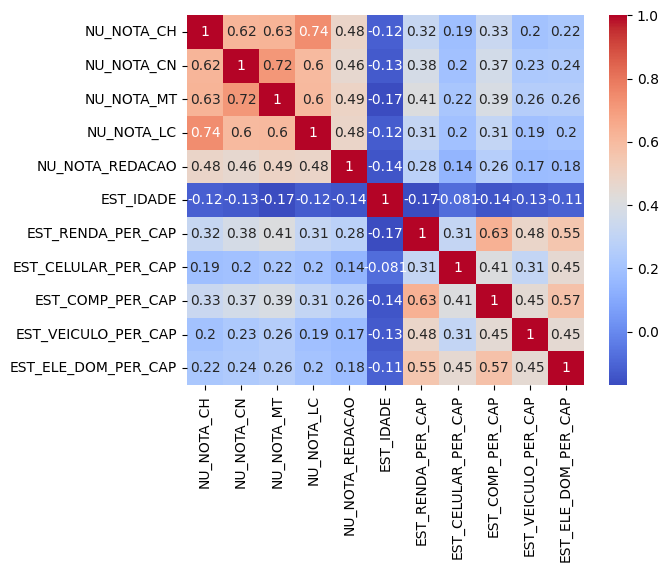

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df)

Matriz de Covariância

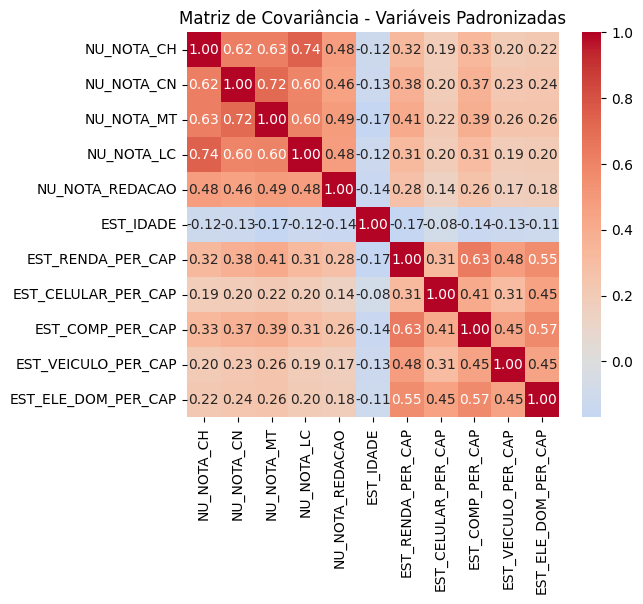

In [38]:
cov_scaled = np.cov(df_padronizado, rowvar=False)
cov_df = pd.DataFrame(cov_scaled, index=colunas, columns=colunas)

# Visualiza
plt.figure(figsize=(6,5))
sns.heatmap(cov_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Covariância - Variáveis Padronizadas")
plt.show()

Implementação do PCA

In [9]:
pca = PCA()
df_pca = pca.fit_transform(df_padronizado)

In [10]:
var_exp = pca.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)

Tabela dos Autovalores e Variância Explicada dos Componentes Principais

In [29]:
# ======== Tabela 1: Autovalores (Eigenvalues) =========
eigenvalues = pca.explained_variance_
diff = np.append(np.diff(eigenvalues), np.nan)
prop = pca.explained_variance_ratio_
cum = np.cumsum(prop)

tabela1 = pd.DataFrame({
    'Component': range(1, len(eigenvalues)+1),
    'Eigenvalue': eigenvalues,
    'Difference': diff,
    'Proportion': prop,
    'Cumulative': cum
})

print("\n=== Eigenvalues (Autovalores) ===")
print(tabela1.round(4))


=== Eigenvalues (Autovalores) ===
    Component  Eigenvalue  Difference  Proportion  Cumulative
0           1      4.5018     -2.7020      0.4092      0.4092
1           2      1.7998     -0.8396      0.1636      0.5728
2           3      0.9602     -0.2213      0.0873      0.6601
3           4      0.7389     -0.1295      0.0672      0.7273
4           5      0.6095     -0.0196      0.0554      0.7827
5           6      0.5899     -0.0958      0.0536      0.8363
6           7      0.4941     -0.0787      0.0449      0.8812
7           8      0.4154     -0.0628      0.0378      0.9190
8           9      0.3526     -0.0705      0.0320      0.9510
9          10      0.2821     -0.0252      0.0256      0.9767
10         11      0.2569         NaN      0.0233      1.0000


Matriz de Cargas (Loadings) da Análise de Componentes Principais

In [30]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=colunas,
    columns=[f'PC{i+1}' for i in range(len(eigenvalues))]
)

print("\n=== Loadings (Autovetores / Pesos das Variáveis) ===")
print(loadings.round(3))


=== Loadings (Autovetores / Pesos das Variáveis) ===
                       PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8  \
NU_NOTA_CH           0.349 -0.321  0.087  0.069 -0.165  0.087  0.441 -0.057   
NU_NOTA_CN           0.355 -0.267  0.052 -0.049 -0.244  0.000 -0.482  0.219   
NU_NOTA_MT           0.367 -0.246  0.005 -0.050 -0.166 -0.000 -0.463  0.140   
NU_NOTA_LC           0.342 -0.326  0.074  0.110 -0.146  0.124  0.491 -0.116   
NU_NOTA_REDACAO      0.284 -0.255 -0.062 -0.001  0.913 -0.105 -0.047 -0.001   
EST_IDADE           -0.119 -0.033  0.973 -0.161  0.094  0.003 -0.045 -0.019   
EST_RENDA_PER_CAP    0.329  0.291 -0.024 -0.349 -0.042 -0.309 -0.010 -0.267   
EST_CELULAR_PER_CAP  0.221  0.323  0.154  0.830  0.044  0.157 -0.195 -0.202   
EST_COMP_PER_CAP     0.330  0.315  0.045 -0.121 -0.071 -0.360  0.006 -0.447   
EST_VEICULO_PER_CAP  0.250  0.351 -0.028 -0.353  0.108  0.818 -0.018 -0.028   
EST_ELE_DOM_PER_CAP  0.278  0.425  0.083  0.054  0.028 -0.219  0.273  0.776  

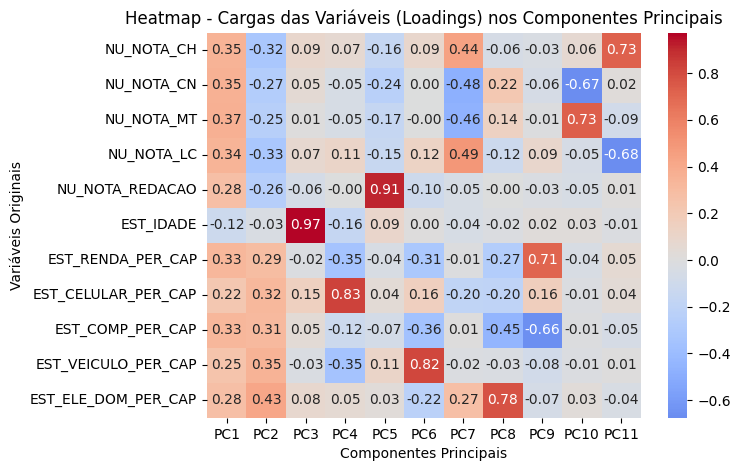

In [40]:
plt.figure(figsize=(7, 5))
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap - Cargas das Variáveis (Loadings) nos Componentes Principais")
plt.xlabel("Componentes Principais")
plt.ylabel("Variáveis Originais")
plt.show()

Scree Plot (PCA)

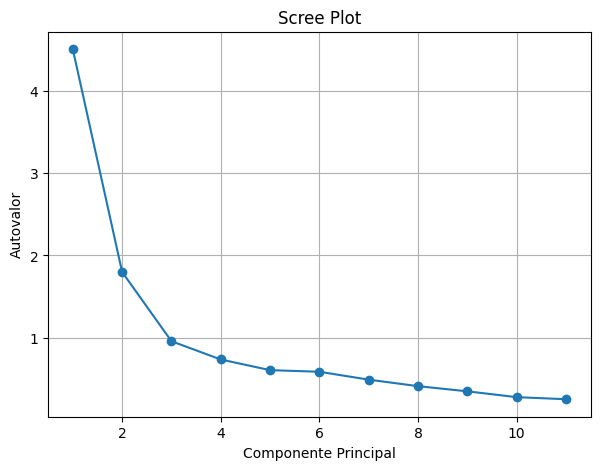

In [34]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Componente Principal")
plt.ylabel("Autovalor")
plt.grid(True)
plt.show()

DF com os novos componentes

In [14]:
pca_df = pd.DataFrame(df_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
print("\nComponentes principais (primeiras linhas):")
pca_df.head()


Componentes principais (primeiras linhas):


,PC1,PC2,PC3
0,1.369095,4.787757,3.211590
1,-0.348810,-0.688045,0.734067
2,2.119328,-1.096831,0.799348
3,0.999059,0.514352,-0.848054
4,1.984490,-1.065528,0.906704
